Ejercicio de analítica predictiva con dataset de diabetes disponible en https://www.kaggle.com/datasets/angeltorresdelalamo/pimaindiansdiabetesdatabase/

---
### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


---
### Se carga el dataset

In [2]:
df = pd.read_csv('diabetes.csv')

---
### Análisis inicial de los datos

In [3]:
print('Filas:', df.shape[0])
print('Columnas:', df.shape[1])
print('Nombres de columnas:', df.columns.tolist())
print('Primeras 5 filas del dataset:')
print(df.head())

Filas: 768
Columnas: 9
Nombres de columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Primeras 5 filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### Personas con diabetes

In [4]:
#Obtiene los totales de 'Outcome'
total_outcome = df['Outcome'].value_counts()

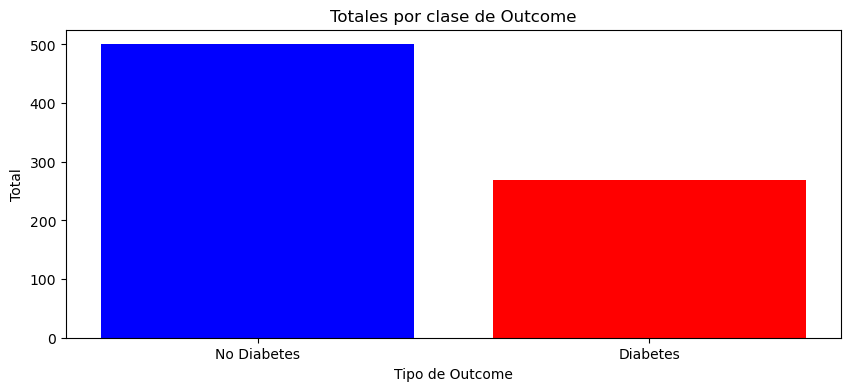

In [5]:
#Grafica los totales
plt.figure(figsize=(10, 4))
plt.bar(total_outcome.index, total_outcome.values, color=['blue', 'red'])
plt.xlabel('Tipo de Outcome')
plt.ylabel('Total')
plt.title('Totales por clase de Outcome')
plt.xticks(total_outcome.index, ['No Diabetes', 'Diabetes'])
plt.show()

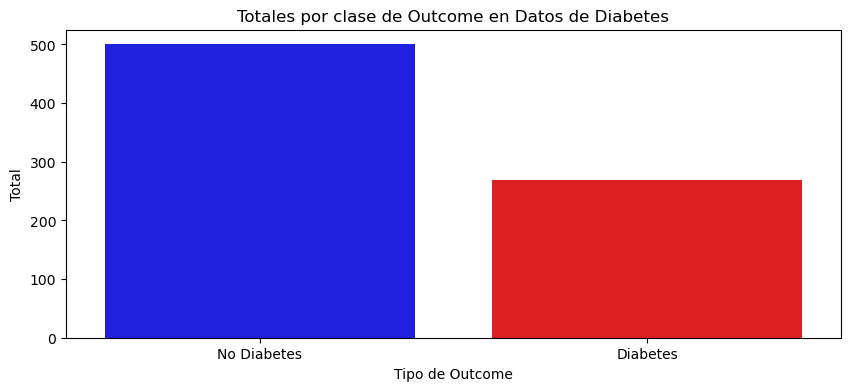

In [6]:
#La misma gráfica con Seaborn
plt.figure(figsize=(10, 4))
sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])
plt.xlabel('Tipo de Outcome')
plt.ylabel('Total')
plt.title('Totales por clase de Outcome en Datos de Diabetes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

#### Se crea el conjunto de datos de entrenamiento y prueba

In [7]:
#Se utiliza train_test para separar datos entrenamiento - prueba
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, df.columns != 'Outcome'], 
                                                    df['Outcome'], 
                                                    stratify=df['Outcome'], 
                                                    random_state=66)


#### Se implementa un clasificador de árbol de decisión

In [8]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Exactitud en el conjunto de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Exactitud en el conjunto de prueba: {:.3f}'.format(tree.score(X_test, y_test)))


Exactitud en el conjunto de entrenamiento: 1.000
Exactitud en el conjunto de prueba: 0.714


In [9]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print('Exactitud en el conjunto de entrenamiento: {:.3f}'.format(tree.score(X_train, y_train)))
print('Exactitud en el conjunto de prueba: {:.3f}'.format(tree.score(X_test, y_test)))


Exactitud en el conjunto de entrenamiento: 0.773
Exactitud en el conjunto de prueba: 0.740
